<a href="https://colab.research.google.com/github/Asfa271/Asfa271/blob/main/dfs_BFS_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective: Implement search algorithms and apply them to solve problems.**

All Paths from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Peshawar -> Quetta -> Karachi
Islamabad -> Peshawar -> Quetta -> Karachi
Islamabad -> Lahore -> Multan -> Karachi


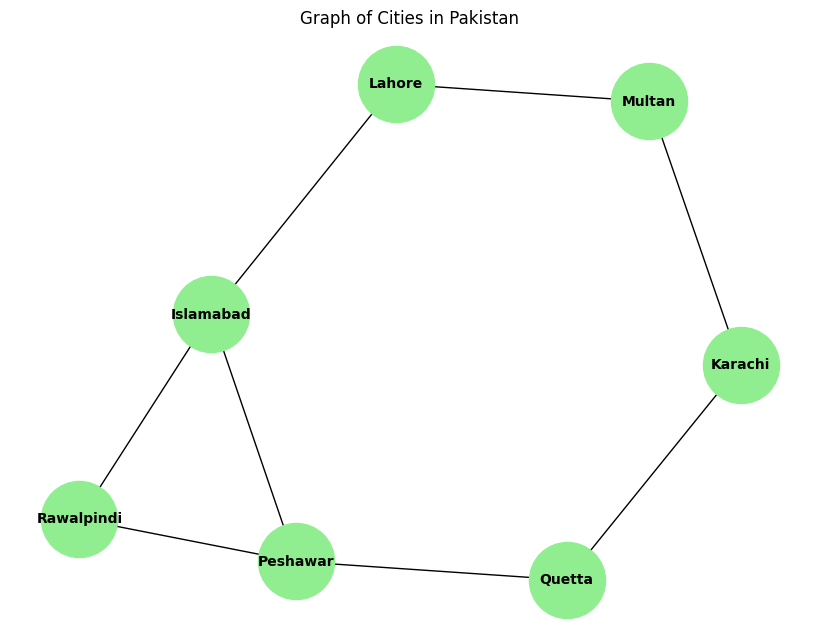

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Depth First Search (DFS) function to find all possible paths from 'start' to 'goal'
def dfs(graph, start, goal, path=None):
    if path is None:
        path = []

    # Add current node to the path
    path = path + [start]

    # If the start node is the goal, return the current path
    if start == goal:
        return [path]

    # If the start node is not in the graph, return an empty list (no paths)
    if start not in graph:
        return []

    paths = []  # List to store all found paths

    # Loop through neighbors of the current node
    for neighbor in graph[start]:
        if neighbor not in path:  # Avoid revisiting nodes
            # Recursively explore all paths from the neighbor to the goal
            new_paths = dfs(graph, neighbor, goal, path)
            for p in new_paths:
                paths.append(p)  # Append found paths to the main list

    return paths


# Graph representing cities in Pakistan as nodes and connections as edges
pakistan_cities_graph = {
    'Islamabad': ['Rawalpindi', 'Peshawar', 'Lahore'],
    'Rawalpindi': ['Islamabad', 'Peshawar'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan'],
    'Multan': ['Lahore', 'Karachi'],
    'Karachi': ['Multan', 'Quetta'],
    'Quetta': ['Peshawar', 'Karachi']
}

# Find and print all paths from Islamabad to Karachi
paths = dfs(pakistan_cities_graph, 'Islamabad', 'Karachi')
print("All Paths from Islamabad to Karachi:")
for path in paths:
    print(" -> ".join(path))


# Function to plot the graph of cities using NetworkX
def plot_graph(graph):
    G = nx.Graph()  # Create a graph object

    # Add edges between cities (nodes) and their neighbors
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    # Set up the plot with size and layout for visualization
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Define layout of nodes
    # Draw the graph with node labels, colors, and other visual properties
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000,
            font_size=10, font_weight='bold', edge_color='black')
    plt.title("Graph of Cities in Pakistan")  # Add a title to the plot
    plt.show()  # Display the graph


# Call the plot function to visualize the cities graph
plot_graph(pakistan_cities_graph)

